In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [4]:
def flatten_list(list):
    return [item for sublist in list for item in sublist]

In [129]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [130]:
df.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Esteban Crespo             1
Anuranjan Premji           1
Chris Blake                1
Walerian Borowczyk         1
Christophe Charrier        1
Name: director, Length: 4048, dtype: int64

In [131]:
len(df[df['director'].isna()  == True])

2389

In [132]:
df[df['type'] == 'TV Show'].director.value_counts()

Alastair Fothergill              3
Ken Burns                        2
Iginio Straffi                   2
Stan Lathan                      2
Shin Won-ho                      2
                                ..
Justin Webster                   1
Philippa Lowthorpe               1
Toby Haynes                      1
Jung-ah Im                       1
David Chuang, Chen Kuan-chung    1
Name: director, Length: 177, dtype: int64

In [133]:
len(df[df['type'] == 'TV Show'][df['director'].isna()  == True])

<ipython-input-133-f2cccf68d130>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['type'] == 'TV Show'][df['director'].isna()  == True])


2226

In [134]:
df[df["director"].str.contains('Raúl Campos') == True].describe()

,Unnamed: 0,release_year
count,20.000000,20.000000
mean,3648.250000,2017.400000
std,2041.023295,0.820783
min,370.000000,2016.000000
25%,1562.250000,2017.000000
50%,3945.000000,2018.000000
75%,5260.750000,2018.000000
max,7126.000000,2018.000000


In [135]:
df['type'].fillna('Missing')
df['title'].fillna('Missing')
df['director'].fillna('Missing')

0                 Missing
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              Missing
7785              Missing
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

In [136]:
df.type.describe()

count      7787
unique        2
top       Movie
freq       5377
Name: type, dtype: object

In [137]:
type_counts = df['type'].value_counts()
type_counts

Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:>

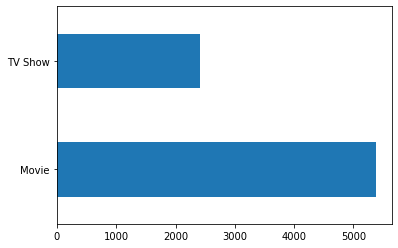

In [138]:
type_counts.plot(kind='barh', rot=0)

In [139]:
clean_director = Series(flatten_list([x.split(', ') for x in df.director.dropna()]))
clean_director.describe()

count          6115
unique         4477
top       Jan Suter
freq             21
dtype: object

In [140]:
director_counts = director_counts = Series(flatten_list([x.split(', ') for x in df.director.dropna()])).value_counts()
director_counts[director_counts>1]

Jan Suter                           21
Raúl Campos                         20
Marcus Raboy                        16
Jay Karas                           15
Cathy Garcia-Molina                 13
                                    ..
Thomas Astruc                        2
Stephen Chow                         2
Florian Henckel von Donnersmarck     2
Richard Bailey                       2
Rajat Kapoor                         2
Length: 871, dtype: int64

<AxesSubplot:>

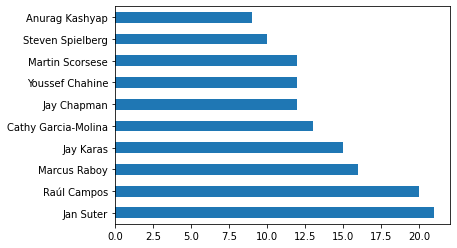

In [141]:
director_counts[:10].plot(kind='barh', rot=0)

Let's see who's in the most titles.

In [142]:
ccast = Series(flatten_list([x.split(', ') for x in df.cast.dropna()]))
ccast.describe()

count           55955
unique          32881
top       Anupam Kher
freq               42
dtype: object

I want to make an endpoint in the API that gives you more details on each director. Testing out some ideas here. Let's see if we can find a director's frequent collaborators.

In [143]:
raw_collabs = df[df.director.str.contains('Jan Suter') == True].director
collabs = Series(flatten_list([x.split(', ') for x in raw_collabs]))
collabs[collabs.str.contains('Jan Suter') == False]

0     Raúl Campos
2     Raúl Campos
5     Raúl Campos
6     Raúl Campos
8     Raúl Campos
10    Raúl Campos
13    Raúl Campos
15    Raúl Campos
17    Raúl Campos
19    Raúl Campos
21    Raúl Campos
23    Raúl Campos
25    Raúl Campos
27    Raúl Campos
29    Raúl Campos
31    Raúl Campos
34    Raúl Campos
35    Raúl Campos
37    Raúl Campos
39    Raúl Campos
dtype: object

Hmm looks like Raúl Campos uses a second last name in one of his movies. We'll want to standarize that so we're not miscounting him in the top 5.

In [144]:
df.loc[df.director.str.contains('Raúl Campos') == True, 'director']

370     Raúl Campos, Jan Suter
568     Raúl Campos, Jan Suter
1219    Jan Suter, Raúl Campos
1220    Raúl Campos, Jan Suter
1443    Raúl Campos, Jan Suter
1602    Raúl Campos, Jan Suter
2148    Raúl Campos, Jan Suter
3123    Raúl Campos, Jan Suter
3805    Raúl Campos, Jan Suter
3885    Raúl Campos, Jan Suter
4005    Raúl Campos, Jan Suter
4415    Raúl Campos, Jan Suter
5195    Raúl Campos, Jan Suter
5196    Raúl Campos, Jan Suter
5197    Raúl Campos, Jan Suter
5452    Raúl Campos, Jan Suter
5615    Jan Suter, Raúl Campos
5690    Raúl Campos, Jan Suter
5691    Raúl Campos, Jan Suter
7126    Raúl Campos, Jan Suter
Name: director, dtype: object

In [145]:
df.loc[df.director.str.contains('Raúl Campos') == True, 'director'] = df.loc[df.director.str.contains('Raúl Campos') == True, 'director'].replace('Raúl Campos Delgado', 'Raúl Campos', regex=True)

In [146]:
df.loc[df.director.str.contains('Raúl Campos') == True, 'director']

370     Raúl Campos, Jan Suter
568     Raúl Campos, Jan Suter
1219    Jan Suter, Raúl Campos
1220    Raúl Campos, Jan Suter
1443    Raúl Campos, Jan Suter
1602    Raúl Campos, Jan Suter
2148    Raúl Campos, Jan Suter
3123    Raúl Campos, Jan Suter
3805    Raúl Campos, Jan Suter
3885    Raúl Campos, Jan Suter
4005    Raúl Campos, Jan Suter
4415    Raúl Campos, Jan Suter
5195    Raúl Campos, Jan Suter
5196    Raúl Campos, Jan Suter
5197    Raúl Campos, Jan Suter
5452    Raúl Campos, Jan Suter
5615    Jan Suter, Raúl Campos
5690    Raúl Campos, Jan Suter
5691    Raúl Campos, Jan Suter
7126    Raúl Campos, Jan Suter
Name: director, dtype: object

In [147]:
df.loc[df.director.str.contains('Raúl Campos') == True, 'director']

370     Raúl Campos, Jan Suter
568     Raúl Campos, Jan Suter
1219    Jan Suter, Raúl Campos
1220    Raúl Campos, Jan Suter
1443    Raúl Campos, Jan Suter
1602    Raúl Campos, Jan Suter
2148    Raúl Campos, Jan Suter
3123    Raúl Campos, Jan Suter
3805    Raúl Campos, Jan Suter
3885    Raúl Campos, Jan Suter
4005    Raúl Campos, Jan Suter
4415    Raúl Campos, Jan Suter
5195    Raúl Campos, Jan Suter
5196    Raúl Campos, Jan Suter
5197    Raúl Campos, Jan Suter
5452    Raúl Campos, Jan Suter
5615    Jan Suter, Raúl Campos
5690    Raúl Campos, Jan Suter
5691    Raúl Campos, Jan Suter
7126    Raúl Campos, Jan Suter
Name: director, dtype: object

In [148]:
df.to_csv('netflix_titles.csv')

In [114]:
df.country.describe()

count              7280
unique              681
top       United States
freq               2555
Name: country, dtype: object

In [146]:
country_counts = df['country'].value_counts()
country_counts

United States                                                  2555
India                                                           923
United Kingdom                                                  397
Japan                                                           226
South Korea                                                     183
                                                               ... 
France, Belgium, Luxembourg, Romania, Canada, United States       1
Norway, United States                                             1
Brazil, India, China, United States                               1
Argentina, France                                                 1
Denmark, Singapore, Canada, United States                         1
Name: country, Length: 681, dtype: int64

Looks like we have a couple of titles where countries collaborated, that are bunched together as comma separated lists. Let's clean that.

In [147]:
countries_clean = Series(flatten_list([x.split(', ') for x in df.country.dropna()]))
countries_clean.describe()

count              9063
unique              121
top       United States
freq               3296
dtype: object

Looks like a couple thousand entries were bunched up. Let's see if it made a difference.

In [148]:
clean_country_counts = countries_clean.value_counts()
clean_country_counts

United States         3296
India                  990
United Kingdom         722
Canada                 412
France                 349
                      ... 
Somalia                  1
Sudan                    1
Sri Lanka                1
Dominican Republic       1
Mauritius                1
Length: 121, dtype: int64

<AxesSubplot:>

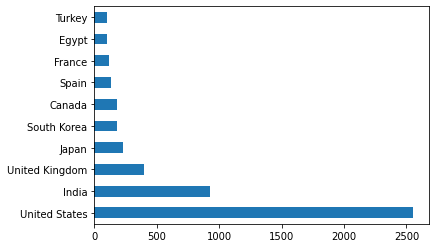

In [149]:
country_counts[:10].plot(kind='barh', rot=0)

<AxesSubplot:>

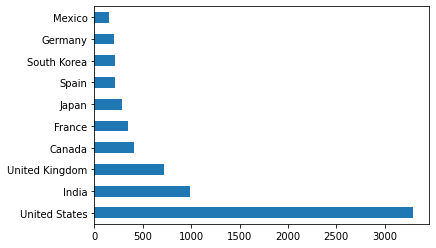

In [150]:
clean_country_counts[:10].plot(kind='barh', rot=0)

We can see the top 10s are significantly different. Countries like Canada and France jump ahead spots, while Germany and Mexico manage to make it into the top 10.

In [84]:
data.release_year.describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Interesting, half of Netflix titles were released after 2017.

In [43]:
release_year_counts = data['release_year'].value_counts()
release_year_counts

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64

<AxesSubplot:>

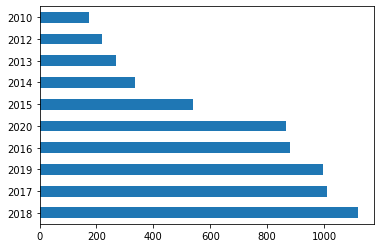

In [44]:
release_year_counts[:10].plot(kind='barh', rot=0)

Let's check the bottom 10.

<AxesSubplot:>

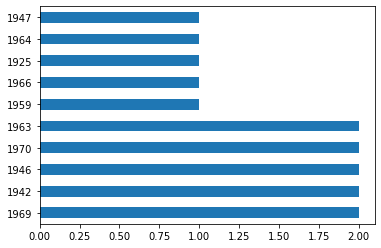

In [87]:
release_year_counts[-10:].plot(kind='barh', rot=0)

In [55]:
rating_counts = data['rating'].value_counts()
rating_counts

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [90]:
data.rating.describe()

count      7780
unique       14
top       TV-MA
freq       2863
Name: rating, dtype: object

<AxesSubplot:>

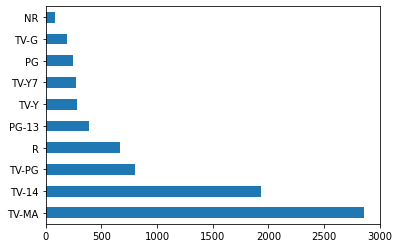

In [56]:
rating_counts[:10].plot(kind='barh', rot=0)

In [132]:
listed_in_clean = Series(flatten_list([x.split(', ') for x in data.listed_in.dropna()]))
listed_in_counts = listed_in_clean.value_counts()
listed_in_counts[:10]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
dtype: int64

In [117]:
listed_in_clean.describe()

count                    17071
unique                      42
top       International Movies
freq                      2437
dtype: object

<AxesSubplot:>

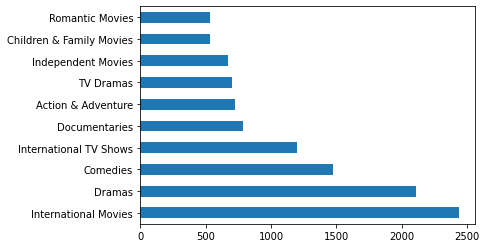

In [133]:
listed_in_counts[:10].plot(kind='barh', rot=0)

What are the least common listings on Netflix?

<AxesSubplot:>

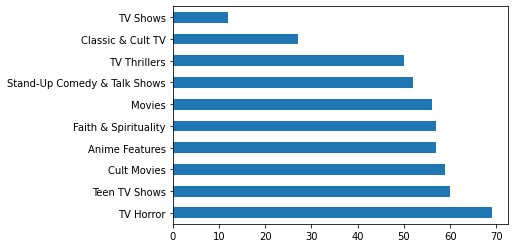

In [134]:
listed_in_counts[-10:].plot(kind='barh', rot=0)

Let's look at the 10 oldest titles.

In [23]:
df.sort_values(by="release_year")[:10]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
6117,s6118,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
4960,s4961,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
7616,s7617,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
7268,s7269,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
6699,s6700,Movie,The Negro Soldier,Stuart Heisler,NaN,United States,"March 31, 2017",1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
6657,s6658,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
5371,s5372,Movie,San Pietro,John Huston,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."


In [8]:
x = 10
df[:x]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
